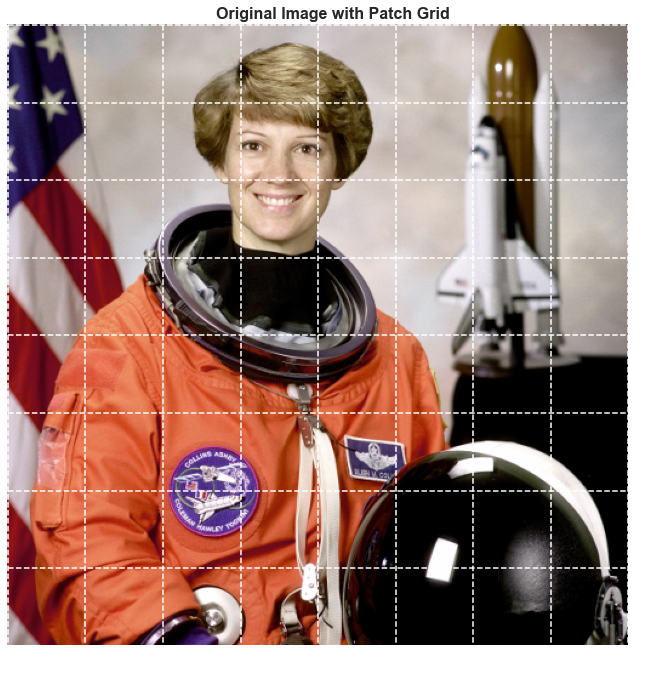

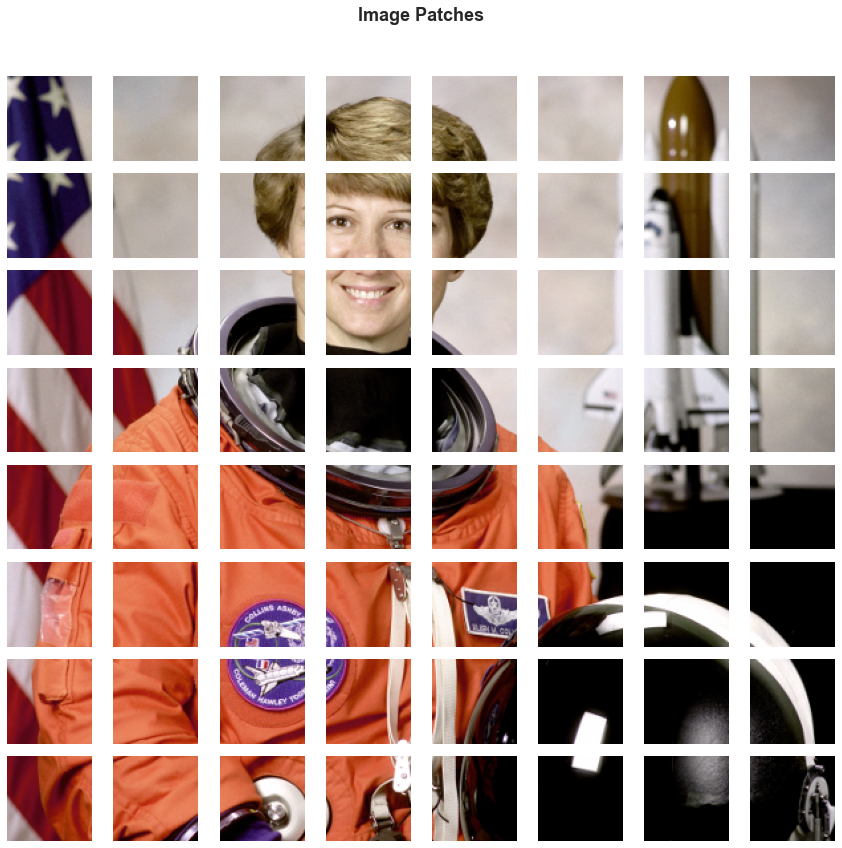

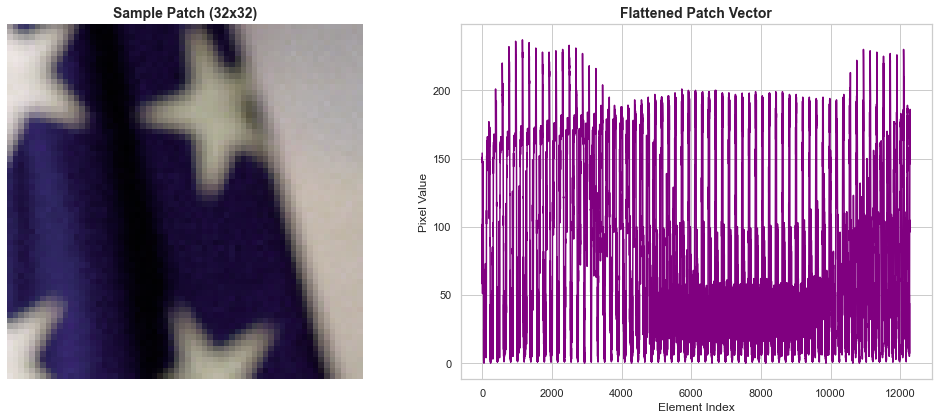

ValueError: n_components=128 must be between 0 and min(n_samples, n_features)=64 with svd_solver='full'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import data
from sklearn.decomposition import PCA

# Set a seaborn style for all plots
sns.set_theme(style="whitegrid")

# Step 1: Load a sample image
image = data.astronaut()  # You can replace this with any image you like

# Step 2: Define the patch size and compute the number of patches
patch_size = (64, 64)  # Height and width of each patch
num_patches_y = image.shape[0] // patch_size[0]
num_patches_x = image.shape[1] // patch_size[1]

# Crop the image to fit an exact number of patches
cropped_image = image[:num_patches_y * patch_size[0], :num_patches_x * patch_size[1], :]

# Step 3: Visualize the original image with patch grids
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(cropped_image)
ax.set_title('Original Image with Patch Grid', fontsize=16, fontweight='bold')

# Draw grid lines
for i in range(num_patches_y + 1):
    ax.hlines(i * patch_size[0], 0, cropped_image.shape[1], colors='white', linestyles='dashed')
for j in range(num_patches_x + 1):
    ax.vlines(j * patch_size[1], 0, cropped_image.shape[0], colors='white', linestyles='dashed')
ax.axis('off')
plt.show()

# Step 4: Extract and display individual patches
patches = []
for i in range(num_patches_y):
    for j in range(num_patches_x):
        patch = cropped_image[
            i * patch_size[0] : (i + 1) * patch_size[0],
            j * patch_size[1] : (j + 1) * patch_size[1],
            :
        ]
        patches.append(patch)

fig, axes = plt.subplots(num_patches_y, num_patches_x, figsize=(12, 12))
fig.suptitle('Image Patches', fontsize=18, fontweight='bold')
for idx, patch in enumerate(patches):
    ax = axes[idx // num_patches_x, idx % num_patches_x]
    ax.imshow(patch)
    ax.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top to fit title
plt.show()

# Step 5: Demonstrate the flattening of a patch and embedding
# Select one patch to illustrate
sample_patch = patches[0]
flattened_patch = sample_patch.flatten()

# Show the original patch and its flattened version
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original patch
axs[0].imshow(sample_patch)
axs[0].set_title('Sample Patch (32x32)', fontsize=14, fontweight='bold')
axs[0].axis('off')

# Flattened patch representation
sns.lineplot(x=np.arange(len(flattened_patch)), y=flattened_patch, ax=axs[1], lw=1.5, color="purple")
axs[1].set_title('Flattened Patch Vector', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Element Index', fontsize=12)
axs[1].set_ylabel('Pixel Value', fontsize=12)

plt.tight_layout()
plt.show()

# Simulate embedding the patches
embedding_dim = 128  # Dimension of the embedding space
flattened_patches = np.array([p.flatten() for p in patches])

# Use PCA to reduce dimensionality (simulate linear projection)
pca = PCA(n_components=embedding_dim)
embedded_patches = pca.fit_transform(flattened_patches)

# Visualize the embeddings
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(embedded_patches.T, cmap="viridis", cbar_kws={'label': 'Embedding Value'}, ax=ax)
ax.set_title('Patch Embeddings (Dimensionality Reduced to 128)', fontsize=16, fontweight='bold')
ax.set_xlabel('Patch Index', fontsize=14)
ax.set_ylabel('Embedding Dimension', fontsize=14)
plt.tight_layout()
plt.show()
